# Assignment 3
## Due May 9th  at 12:00

Please do not change any provided variable name. Read carefully the instructions in the exercise PDF and in this notebook. Add your solutions at `YOUR CODE HERE` and remove the corresponding `raise NotImplementedError()`.
Before submitting: Please make sure, that your notebook can be executed from top to bottom without an error (Menu -> Kernel -> Restart & Run all). 

## Ecercise 1
(a) $\frac{\partial f}{\partial X} = \begin{bmatrix}
                                  \frac{\partial f}{\partial X_1}\\
                                  \frac{\partial f}{\partial X_2}\\
                                  \frac{\partial f}{\partial X_3}  
                                    \end{bmatrix} = \begin{bmatrix}
                                                  2\\
                                                  -1\\
                                                  5  
                                                    \end{bmatrix} = a$


(b) $\frac{\partial f}{\partial X} = \begin{bmatrix}
                                  \frac{\partial f}{\partial X_1} & \frac{\partial f}{\partial X_2}
                                    \end{bmatrix} = \begin{bmatrix}
                                                  2 x_1 + 2  &  6 x_2 + 5
                                                    \end{bmatrix}$

(c) The objective function in least-squares optimization is quadratic, and quadratic functions are defined over a convex domain.

(d) The optimization problem (1) has no constraints. It is an unconstrained optimization problem.

(e) As a quadratic function, it can be differentiated arbitrarily many times, even though the second derivative is constant and all higher derivatives are zero.

(f) $X^T X$ is positive semidefinite iff $v^T X^T X v \geq 0 \quad \forall v \in \mathbb{R}^d$, where d is the number of columns in X. This can be shown by reformulating the equivalence of the multiplication with the quadratic norm: $v^T X^T X v = ||X v||_2^2 \geq 0 \quad \forall v \in \mathbb{R}^d$.

(g) The euclidean norm $||Y - Xw||^2_2 is a convex function of $\beta$. This can be shown by taking the second derivative:

$\mathcal{L}  = ||Y - Xw||^2_2 = y^Ty - 2 y^TX\beta + \beta^T X^T X \beta$

$\frac{\partial \mathcal{L} }{\partial \beta} = - 2 y^TX + 2 \beta^T X^T X$

$\frac{\partial^2 \mathcal{L} }{\partial \beta \beta^T} = 2 X^T X$

As shown above, $X^T X$ is positive definite, and so is the Hessian matrix $2X^T X$. The least squares problem is, therefore, defined over a convex domain.

## Exercise 2
(a) Since $X^T X$ has rank $2 < d$, it is not invertible and the solution $w$ is given by the generalized inverse: $\hat{w} = (X^T X)^+ (X^T y) = (1.66, 1.33, 0.33)^T$ as well as $w+v \quad \forall v: Xv = 0$. $v$ is given by the Eigenvector(s) corresponding to the Eigenvalue(s) that are zero: $v = (-0.577,0.577,0.577)^T$. 

(b) Predictions on the test points are not, in general, equal for all solutions (they are only equal for the training points). They happen to be equal for $X_5$ because $X_5v = 0$.

$\hat{Y}(X_5) = X_5 w = X_5 (w+v) = 2$

$\hat{Y}(X_6) =  \{x_6 w, X_6 (w+v)\} = \{1.66, 1.08\}$


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize

## Exercise 3

In [2]:
def get_data(n, seed=42):
    np.random.seed(seed)
    
    X = np.random.uniform(low=0, high=2, size=(n, 1))
    epsilon = np.random.normal(0, 2, (n, 1))
    y = 2 * np.sin(2 * X) + 0.1 * epsilon
    
    return X, y

In [3]:
xs, ys = get_data(100)
xs.shape, ys.shape

((100, 1), (100, 1))

### a)

Text(0, 0.5, 'y')

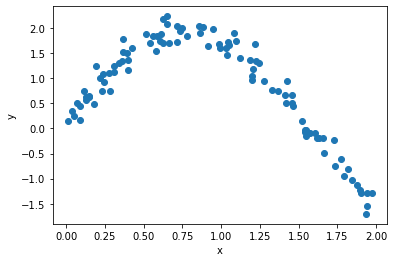

In [4]:
# Create a new figure with new default axis
fig, axis = plt.subplots(1, 1)

# Plot here in axis
axis.scatter(xs,ys)
axis.set_xlabel("x")
axis.set_ylabel("y")

### b)

In [5]:
def ridge_regression(xs, ys, lam=1):
    n = len(ys)
    d = xs. shape[1]
    w = np.linalg.inv(xs.T @ xs + n*lam*np.eye(d)) @ xs.T @ ys
    return w


def lasso_regression(xs, ys, lam=1):
    
    objective = lambda w: (1/len(ys)) * np.linalg.norm(ys - xs@w, 2) + lam*np.linalg.norm(w,1)
        
    w = minimize(objective, x0 = np.random.rand(xs.shape[1]))
    w = w.x
    return w



### c)

$\lambda = \{0.1, 1, 10\}$

Ridge Regression:

In [6]:
lambdas = [0.1, 1, 10]
mse_per_lambda = [None, None, None]
ys_pred_per_lambda = [None, None, None]

for i, lam in enumerate(lambdas):
    # ridge regession
    w = ridge_regression(xs,ys,lam)
    ys_pred = xs@w
    ys_pred_per_lambda[i] = ys_pred
    mse = np.linalg.norm(ys-ys_pred,2)
    mse_per_lambda[i] = mse
    
print(mse_per_lambda)

[12.310054831360578, 12.42944817421166, 12.785781568283044]


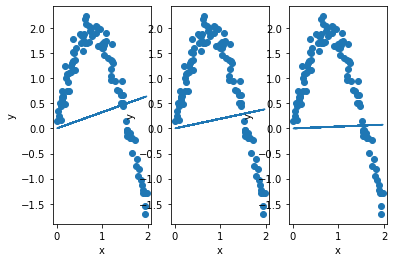

In [7]:
fig, axis = plt.subplots(1, 3)

for ax, ys_pred in zip(axis, ys_pred_per_lambda):
    plt.sca(ax)  # enable axis
    
    # First plot scatters, then the regression line
    ax.scatter(xs,ys)
    ax.plot(xs, ys_pred)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

Lasso Regression:

[99.56600116246693, 129.084784011207, 129.08478416407965]


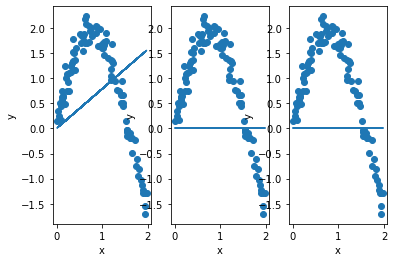

In [8]:
mse_per_lambda = [None, None, None]
ys_pred_per_lambda = [None, None, None]

for i, lam in enumerate(lambdas):
    # lasso regession
    w = lasso_regression(xs,ys,lam)
    ys_pred = xs@w
    ys_pred_per_lambda[i] = ys_pred
    mse = np.linalg.norm(ys-ys_pred,2)
    mse_per_lambda[i] = mse

    
print(mse_per_lambda)


fig, axis = plt.subplots(1, 3)

for ax, ys_pred in zip(axis, ys_pred_per_lambda):
    plt.sca(ax)  # enable axis
    
    # First plot scatters, then the regression line
    ax.scatter(xs,ys)
    ax.plot(xs, ys_pred)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

### d)

Text(0, 0.5, '|weight| of quadratic term')

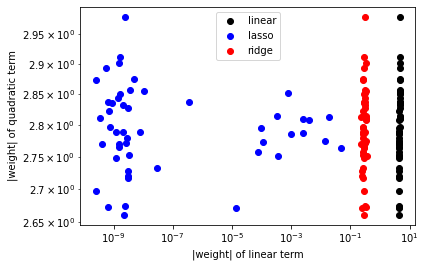

In [43]:
datasets  = [(np.c_[xs, xs**2], ys) for xs, ys in
            (get_data(100, seed=seed) for seed in range(0, 100, 2))]

ws_linear = np.array([ridge_regression(xs,ys, lam=0) for xs,ys in datasets]).squeeze()
ws_lasso  = np.array([lasso_regression(xs,ys,lam=1) for xs,ys in datasets]).squeeze()
ws_ridge  = np.array([ridge_regression(xs,ys, lam=1) for xs,ys in datasets]).squeeze()
     

fig, axis = plt.subplots(1, 1)
# Scatter plot the absolute weight values
# use logarithmic axis scales and 
# set appropriate axis limits
axis.scatter(np.abs(ws_linear[:,0]),np.abs(ws_linear[:,1]),c="k", label="linear")
axis.scatter(np.abs(ws_lasso[:,0]),np.abs(ws_linear[:,1]),c="b", label="lasso")
axis.scatter(np.abs(ws_ridge[:,0]),np.abs(ws_linear[:,1]),c="r", label="ridge")
axis.legend()
axis.set_xscale("log")
axis.set_yscale("log")
axis.set_xlabel("|weight| of linear term")
axis.set_ylabel("|weight| of quadratic term")


### e)

Ridge regression

In [52]:
Xs = np.concatenate([np.ones((xs.shape[0],1)), xs, xs**2],axis=1)
lambdas = [0.001, 0.01, 0.1, 1, 10]
mse_per_lambda = [None]*len(lambdas)
ys_pred_per_lambda = [None]*len(lambdas)

for i, lam in enumerate(lambdas):
    # ridge regession
    w = ridge_regression(Xs,ys,lam)
    ys_pred = Xs@w
    ys_pred_per_lambda[i] = ys_pred
    mse = np.linalg.norm(ys-ys_pred,2)
    mse_per_lambda[i] = mse

best_lambda = lambdas[np.argmin(mse_per_lambda)]
best_error = np.min(mse_per_lambda)
print(f'best lambda: {best_lambda}')
print(f'mse: {best_error}')

best lambda: 0.001
mse: 2.194056013667452


Text(0, 0.5, 'MSE')

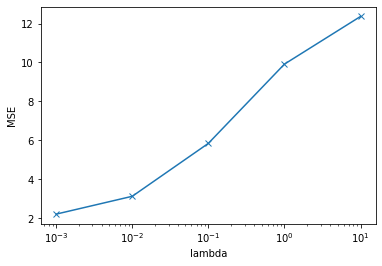

In [54]:
fig, axis = plt.subplots(1, 1)

# Plot line of mse as a function of lambda


#pred = []
#for i in lambdas:
#    w = ridge_regression(Omega, ys, lam=i)
#    ys_pred = Omega @ w
#    pred.append(((ys - ys_pred) ** 2).mean())
axis.plot(lambdas, mse_per_lambda, marker='x')
### END SOLUTION
plt.xscale('log')
axis.set_xlabel("lambda")
axis.set_ylabel("MSE")

In [1]:
#plot best prediction
fig, axis = plt.subplots(1, 1)

# First plot scatters, then the regression line
axis.scatter(xs, ys, label="data")
axis.scatter(xs, ys_pred_per_lambda[np.argmin(mse_per_lambda)], label = "best prediction")
axis.legend()
axis.set_xlabel("x")
axis.set_ylabel("y")

NameError: name 'plt' is not defined

Linear regresion

In [70]:
w = ridge_regression(Xs,ys,0)
ys_pred_lin = Xs@w
mse = np.linalg.norm(ys-ys_pred,2)

print(mse)

2.1674658747437343


Text(0, 0.5, 'y')

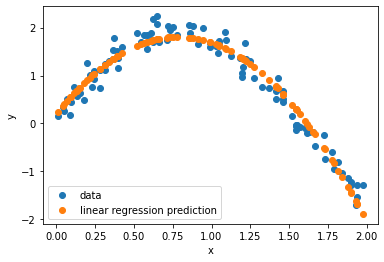

In [71]:
fig, axis = plt.subplots(1, 1)

# First plot scatters, then the regression line
axis.scatter(xs, ys, label="data")
axis.scatter(xs, ys_pred_lin, label = "linear regression prediction")
axis.legend()
axis.set_xlabel("x")
axis.set_ylabel("y")